In [67]:
#Observations
#1. For Capomulin treated mice, higher weight had a positive correlation with higher tumor volume
#2. For Capomulin treated mice, there was a strong correlation between time passed and lower tumor volume
#3. Placebo treatment resulted in very similiar tumor volume to several other treatments.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
# Checking the number of mice.
unique_mice = dataset['Mouse ID'].nunique()
mice_count = len(dataset['Mouse ID'])
print(f'{mice_count} total records with {unique_mice} unique Mouse IDs')

1893 total records with 249 unique Mouse IDs


In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dataset_dupes = dataset[dataset.duplicated(['Mouse ID', 'Timepoint'])]
dataset_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = dataset.drop_duplicates(['Mouse ID', 'Timepoint'])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
# Checking the number of mice in the clean DataFrame.
print(f"{len(clean_data['Mouse ID'])} total records with {clean_data['Mouse ID'].nunique()} unique Mouse IDs")

1888 total records with 249 unique Mouse IDs


## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_statistics = pd.DataFrame({
    'Mean': clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(), 
    'Median': clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(), 
    'Variance': clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
    'Standard Error': clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(), 
    'SEM': clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
})
summary_statistics

,Mean,Median,Variance,Standard Error,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

(146, 240)

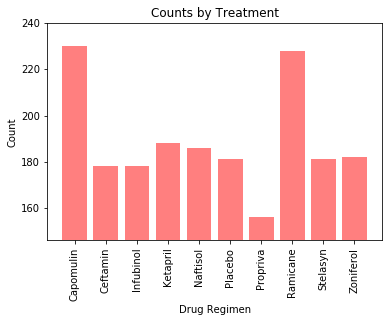

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#treatment = clean_data.groupby('Drug Regimen')['Mouse ID'].count().reset_index()
count_by_treatment = clean_data.groupby('Drug Regimen')['Mouse ID'].count().reset_index()
treatments = count_by_treatment.iloc[:, 0]
treatment_counts = count_by_treatment.iloc[:, 1]

treatment_summary = plt.bar(treatments, treatment_counts, color='r', alpha=0.5, align='center')
plt.title('Counts by Treatment')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.ylim(min(treatment_counts) - 10, max(treatment_counts) + 10)

([<matplotlib.patches.Wedge at 0x14d1746f3c8>,
 [Text(-1.0999781124353174, 0.0069391759767658615, 'Female'),
  Text(1.0999781124353174, -0.006939175976765996, 'Male')],
 [Text(-0.5999880613283548, 0.003785005078235924, '49.8%'),
  Text(0.5999880613283548, -0.0037850050782359972, '50.2%')])

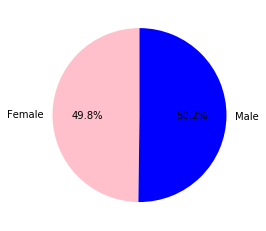

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'blue']
genders = clean_data.groupby('Sex')['Mouse ID'].nunique().reset_index()
plt.pie(genders['Mouse ID'], labels = genders['Sex'], colors=colors, autopct='%1.1f%%', startangle=90)

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_data = clean_data.loc[clean_data['Drug Regimen'].isin(treatment_options)].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = tumor_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_mouse = pd.merge(last_timepoint, clean_data, how='left', on=['Mouse ID', 'Timepoint'])
tumor_by_treatment = merge_mouse[['Mouse ID', 'Tumor Volume (mm3)']]
merge_mouse.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


## Quartiles, Outliers and Boxplots

In [79]:
capomulin = []
ramicane = []
infubinol = []
ceftamin = []
all_drugs = []

for i in range(len(merge_mouse)):
    if merge_mouse['Drug Regimen'][i] == 'Capomulin':
        capomulin.append(merge_mouse['Tumor Volume (mm3)'][i])
        all_drugs.append(merge_mouse['Tumor Volume (mm3)'][i])
    if merge_mouse['Drug Regimen'][i] == 'Ramicane':
        ramicane.append(merge_mouse['Tumor Volume (mm3)'][i])
        all_drugs.append(merge_mouse['Tumor Volume (mm3)'][i])
    if merge_mouse['Drug Regimen'][i] == 'Infubinol':
        infubinol.append(merge_mouse['Tumor Volume (mm3)'][i])
        all_drugs.append(merge_mouse['Tumor Volume (mm3)'][i])
    if merge_mouse['Drug Regimen'][i] == 'Ceftamin':
        ceftamin.append(merge_mouse['Tumor Volume (mm3)'][i])
        all_drugs.append(merge_mouse['Tumor Volume (mm3)'][i])

list_all = [capomulin, ramicane, infubinol, ceftamin]

In [95]:
quartiles = merge_mouse['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f'The IQR across all drug regimens is {round(iqr,2)}')

The IQR across all drug regimens is 22.74


In [117]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers = ({
    'Mouse ID': "",
    'Drug Regimen': "",
    'Tumor Volume (mm3)': "",
})

for treatment in treatment_options:
    drug_df = merge_mouse[merge_mouse['Drug Regimen'] == treatment]
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'The IQR for {treatment} is {iqr}')
    for x in range(len(drug_df)):
        if drug_df['Tumor Volume (mm3)'].iloc[x] < lower_bound or drug_df['Tumor Volume (mm3)'].iloc[x] > upper_bound:
            print(f"Outlier: Mouse {drug_df['Mouse ID'].iloc[x]}, tumor volume of {drug_df['Tumor Volume (mm3)'].iloc[x]}")
            

The IQR for Capomulin is 7.781863460000004
The IQR for Ramicane is 9.098536719999998
The IQR for Infubinol is 11.477135160000003
Outlier: Mouse c326, tumor volume of 36.321345799999996
The IQR for Ceftamin is 15.577752179999997


AxesSubplot(0.125,0.125;0.775x0.755)


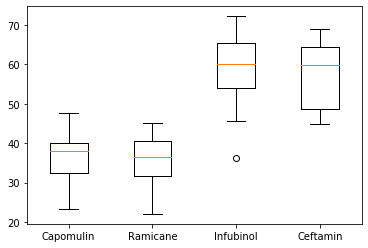

In [88]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()
ax1.boxplot([list_all[0], list_all[1], list_all[2], list_all[3]])
ax1.set_xticklabels(labels)
print(ax1)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

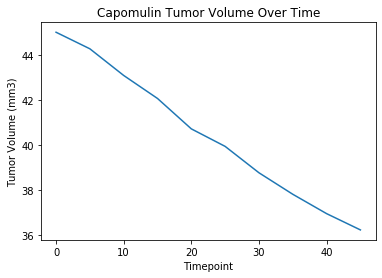

In [82]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = dataset[dataset['Drug Regimen'] == 'Capomulin']

capomulin_time_df = capomulin[['Timepoint', 'Tumor Volume (mm3)']].groupby(capomulin['Timepoint']).mean()
capomulin_time = capomulin_time_df['Timepoint']
capomulin_tumor = capomulin_time_df['Tumor Volume (mm3)']

plt.plot(capomulin_time, capomulin_tumor)
plt.title('Capomulin Tumor Volume Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Tumor Volume (mm3)')

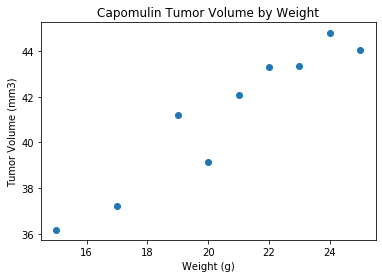

In [85]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight_df = capomulin[['Weight (g)', 'Tumor Volume (mm3)']].groupby(capomulin['Weight (g)']).mean()
capomulin_weight = capomulin_weight_df['Weight (g)']
capomulin_tumor = capomulin_weight_df['Tumor Volume (mm3)']

plt.scatter(capomulin_weight, capomulin_tumor)
plt.title('Capomulin Tumor Volume by Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

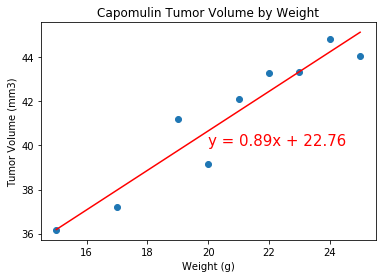

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight, capomulin_tumor)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_weight, capomulin_tumor)
plt.plot(capomulin_weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.title('Capomulin Tumor Volume by Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()